In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160612)
tf.set_random_seed(20160612)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets("tmp/data/", one_hot=True)

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

In [4]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean (tf.cast(correct_prediction, tf.float32))

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [6]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print('step:%d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val) )

step:100, Loss: 3315.877930, Accuracy: 0.907600
step:200, Loss: 2724.184082, Accuracy: 0.921700
step:300, Loss: 2416.110840, Accuracy: 0.929600
step:400, Loss: 2197.919434, Accuracy: 0.934500
step:500, Loss: 2060.498291, Accuracy: 0.939400
step:600, Loss: 1896.254150, Accuracy: 0.945100
step:700, Loss: 1836.532471, Accuracy: 0.946800
step:800, Loss: 1752.767700, Accuracy: 0.948000
step:900, Loss: 1674.839355, Accuracy: 0.949600
step:1000, Loss: 1604.593994, Accuracy: 0.950200
step:1100, Loss: 1567.318970, Accuracy: 0.952000
step:1200, Loss: 1515.589722, Accuracy: 0.953400
step:1300, Loss: 1452.364380, Accuracy: 0.955100
step:1400, Loss: 1425.694092, Accuracy: 0.956000
step:1500, Loss: 1401.055298, Accuracy: 0.957900
step:1600, Loss: 1373.432617, Accuracy: 0.959300
step:1700, Loss: 1343.333496, Accuracy: 0.960800
step:1800, Loss: 1319.251221, Accuracy: 0.960500
step:1900, Loss: 1354.192871, Accuracy: 0.959500
step:2000, Loss: 1285.435303, Accuracy: 0.961800


In [7]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for(image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if(c > 6):
                break

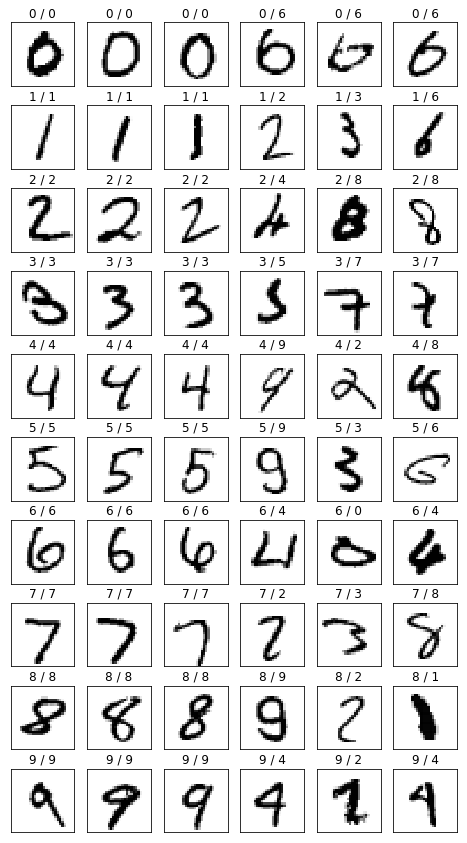

In [8]:
fig